<a href="https://colab.research.google.com/github/channf/Red-Wine-Quality/blob/master/Term_Project_Red_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Wine Quality

## Source 
Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez 
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal 
@2009


## Data Set 
The data set is related to different red wine samples of the Portuguese "Vinho Verde" wine. The quality of wine is scored between 0 (lowest) and 10 (highest). The objective of this project is to predict the wine quality using the wine properties provided in the data set. 

## Attributes 

Input variables (based on physicochemical tests): 

1 - fixed acidity 

2 - volatile acidity 

3 - citric acid 

4 - residual sugar 

5 - chlorides 

6 - free sulfur dioxide 

7 - total sulfur dioxide 

8 - density 

9 - pH 

10 - sulphates 

11 - alcohol 

Output variable (based on sensory data): 

12 - quality (score between 0 and 10)

## Group Members

Annie Zhang, Fily Chan, Joelle Leung, Robert Wang



#Import Libraries and Data Set

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as sm
import statsmodels
import sklearn.linear_model
from sklearn.linear_model import LinearRegression

import scipy, scipy.stats

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

sns.set()

In [0]:
df=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep = ';')

# Data Exploration

In [0]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
list(df)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [0]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [0]:

df.isnull().values.any()

False

# Visualization

In [0]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

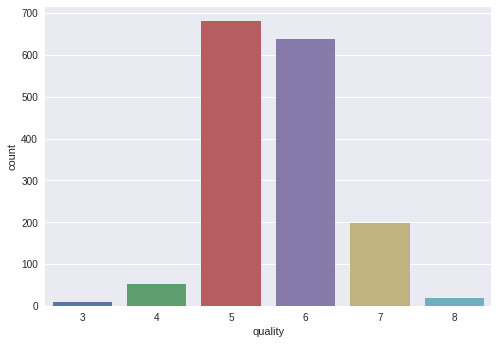

In [0]:
#target variable

sns.countplot(x='quality', data=df)

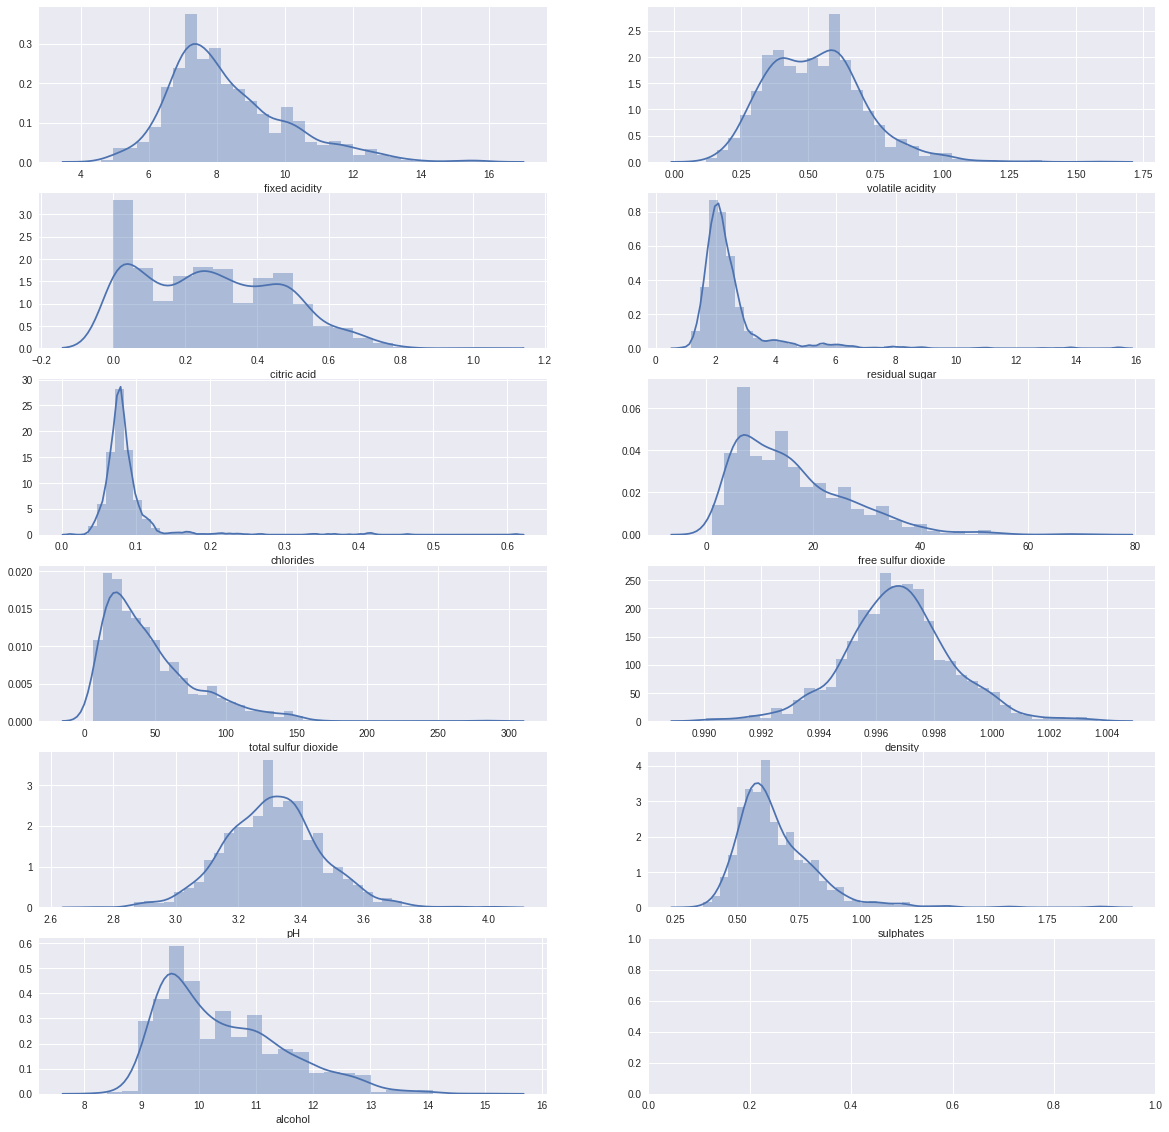

In [0]:
f, ax = plt.subplots(6,2, figsize=(20,20))
sns.distplot(df["fixed acidity"], ax=ax[0,0])
sns.distplot(df["volatile acidity"], ax=ax[0,1])
sns.distplot(df["citric acid"], ax=ax[1,0])
sns.distplot(df["residual sugar"], ax=ax[1,1])
sns.distplot(df["chlorides"], ax=ax[2,0])
sns.distplot(df["free sulfur dioxide"], ax=ax[2,1])
sns.distplot(df["total sulfur dioxide"], ax=ax[3,0])
sns.distplot(df["density"], ax=ax[3,1])
sns.distplot(df["pH"], ax=ax[4,0])
sns.distplot(df["sulphates"], ax=ax[4,1])
sns.distplot(df["alcohol"], ax=ax[5,0])


[Text(0, 0.5, 'alcohol'), Text(0.5, 0, 'quality')]

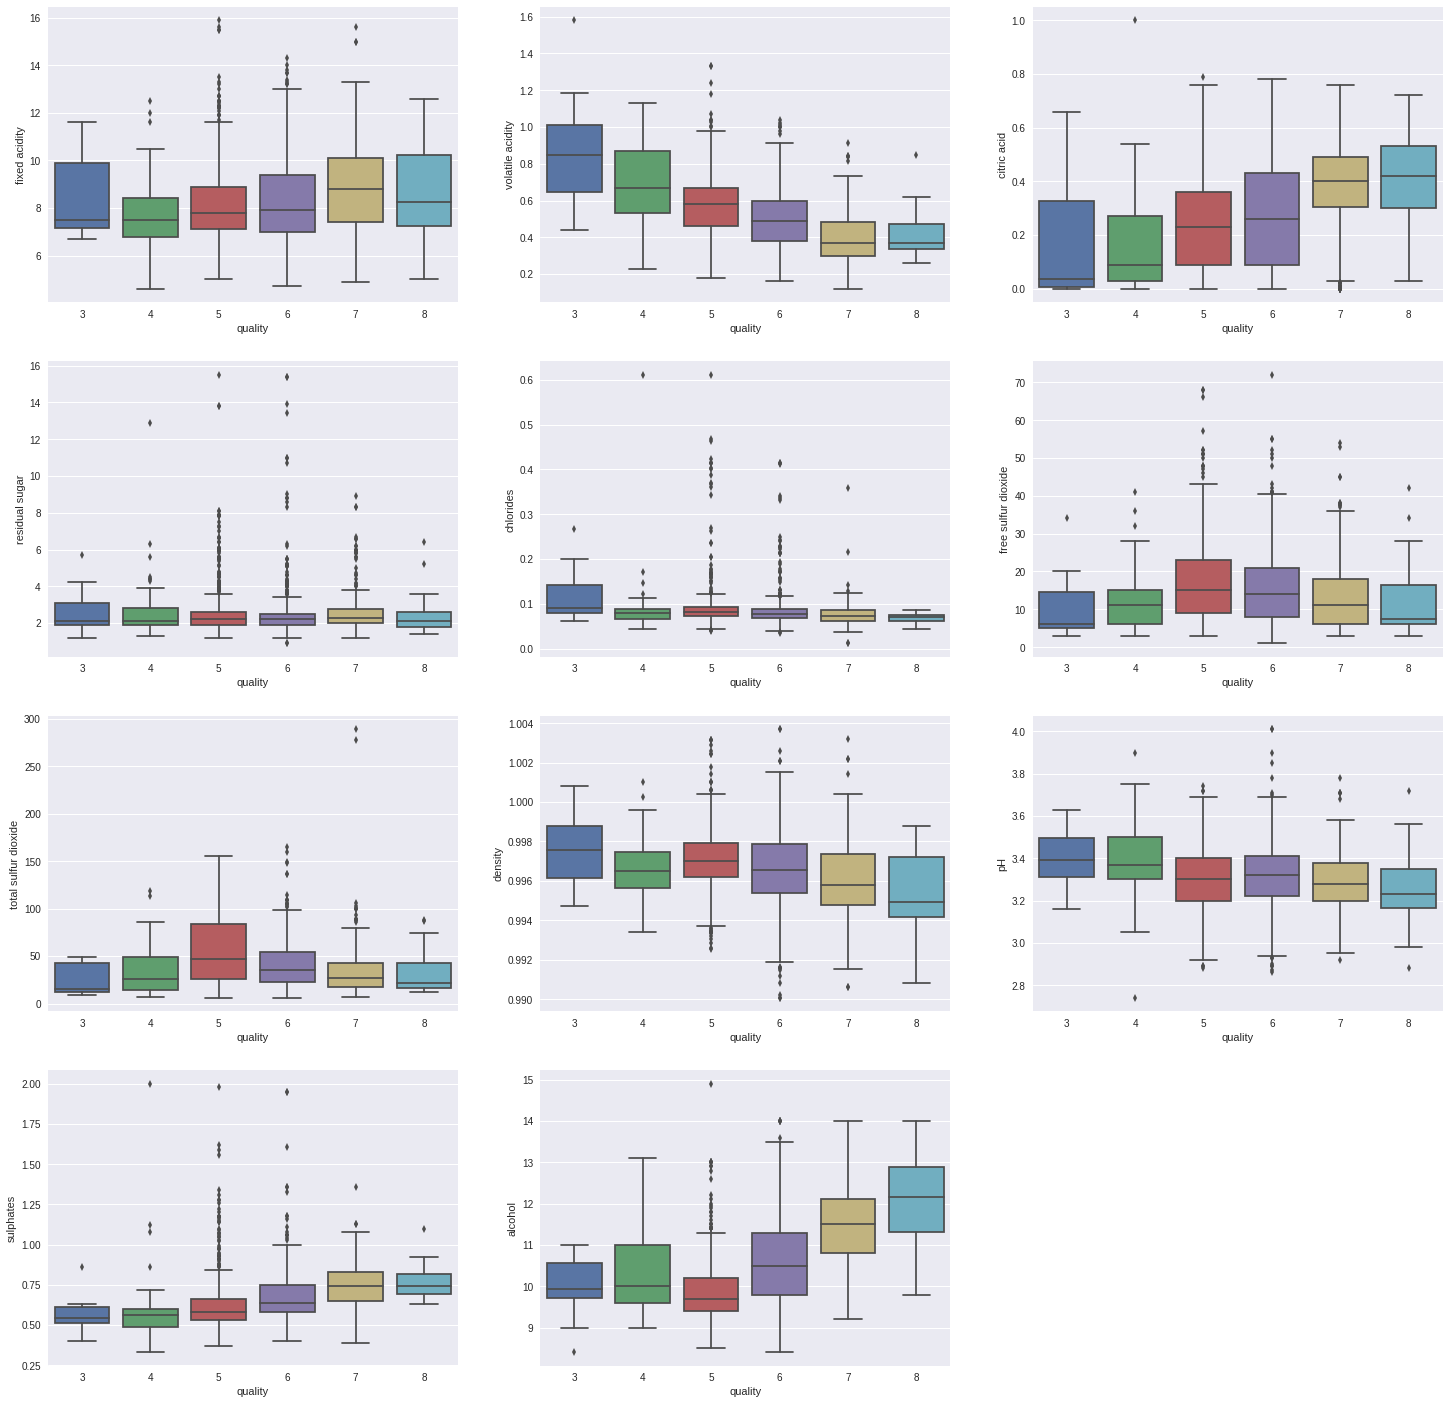

In [0]:
plt.figure(figsize=(25,25))

plt.subplot(431)
sns.boxplot('quality','fixed acidity',data=df).set(xlabel='quality',ylabel='fixed acidity')
# Add title and axis names


plt.subplot(432)
sns.boxplot('quality','volatile acidity',data=df).set(xlabel='quality',ylabel='volatile acidity')

plt.subplot(433)
sns.boxplot('quality','citric acid',data=df).set(xlabel='quality',ylabel='citric acid')


plt.subplot(434)
sns.boxplot('quality','residual sugar',data=df).set(xlabel='quality',ylabel='residual sugar')


plt.subplot(435)
sns.boxplot('quality','chlorides',data=df).set(xlabel='quality',ylabel='chlorides')


plt.subplot(436)
sns.boxplot('quality','free sulfur dioxide',data=df).set(xlabel='quality',ylabel='free sulfur dioxide')


plt.subplot(437)
sns.boxplot('quality','total sulfur dioxide',data=df).set(xlabel='quality',ylabel='total sulfur dioxide')


plt.subplot(438)
sns.boxplot('quality','density',data=df).set(xlabel='quality',ylabel='density')


plt.subplot(439)
sns.boxplot('quality','pH',data=df).set(xlabel='quality',ylabel='pH')


plt.subplot(4,3,10)
sns.boxplot('quality','sulphates',data=df).set(xlabel='quality',ylabel='sulphates')


plt.subplot(4,3,11)
sns.boxplot('quality','alcohol',data=df).set(xlabel='quality',ylabel='alcohol')





# Remove Outliers

In [0]:
from scipy import stats
z= np.abs(stats.zscore(df))
print(z)

[[0.52835961 0.96187667 1.39147228 ... 0.57920652 0.96024611 0.78782264]
 [0.29854743 1.96744245 1.39147228 ... 0.1289504  0.58477711 0.78782264]
 [0.29854743 1.29706527 1.18607043 ... 0.04808883 0.58477711 0.78782264]
 ...
 [1.1603431  0.09955388 0.72391627 ... 0.54204194 0.54162988 0.45084835]
 [1.39015528 0.65462046 0.77526673 ... 0.30598963 0.20930812 0.78782264]
 [1.33270223 1.21684919 1.02199944 ... 0.01092425 0.54162988 0.45084835]]


In [0]:
df_o=df[(z<3).all(axis=1)]

In [0]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


In [0]:
df_o = df_o[~((df_o < (Q1 - 1.5 * IQR)) |(df_o > (Q3 + 1.5 * IQR))).any(axis=1)]
df_o.shape

(1179, 12)

[Text(0, 0.5, 'alcohol'), Text(0.5, 0, 'quality')]

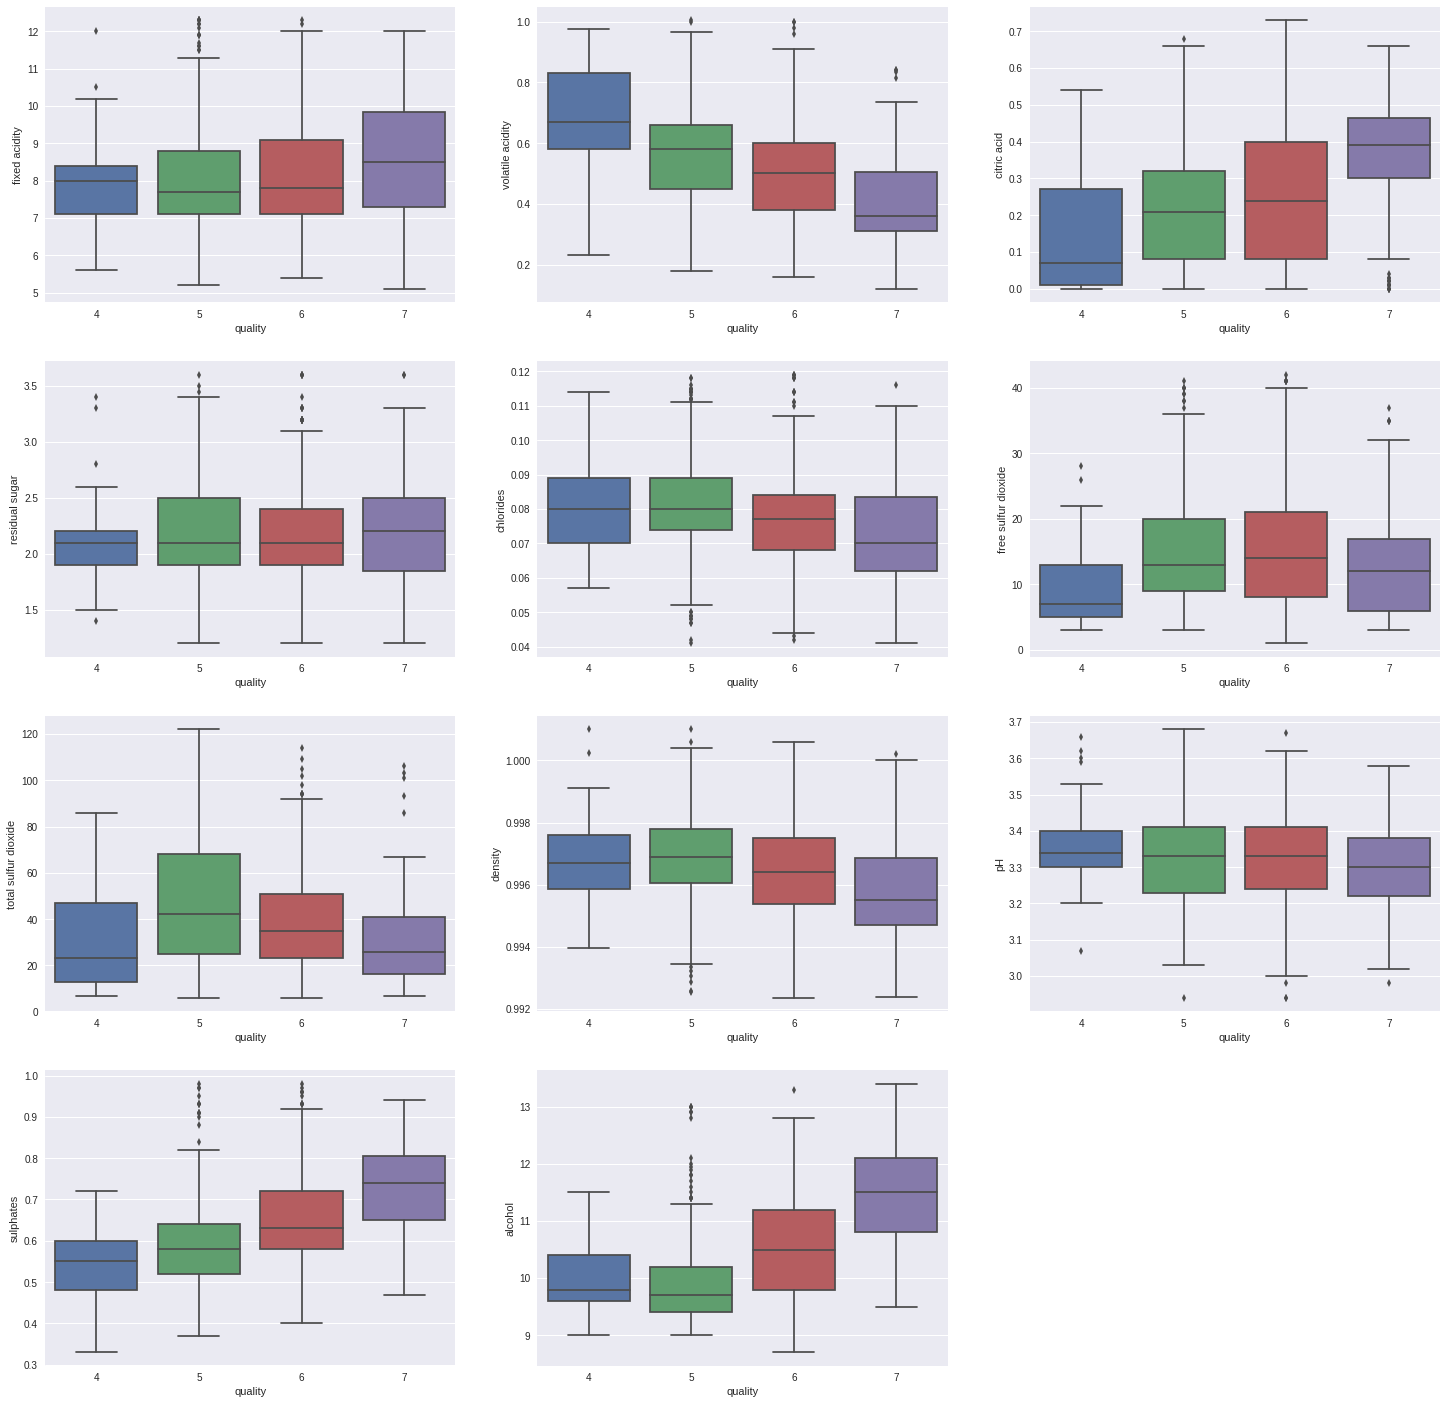

In [0]:
plt.figure(figsize=(25,25))

plt.subplot(431)
sns.boxplot('quality','fixed acidity',data=df_o).set(xlabel='quality',ylabel='fixed acidity')
# Add title and axis names


plt.subplot(432)
sns.boxplot('quality','volatile acidity',data=df_o).set(xlabel='quality',ylabel='volatile acidity')

plt.subplot(433)
sns.boxplot('quality','citric acid',data=df_o).set(xlabel='quality',ylabel='citric acid')


plt.subplot(434)
sns.boxplot('quality','residual sugar',data=df_o).set(xlabel='quality',ylabel='residual sugar')


plt.subplot(435)
sns.boxplot('quality','chlorides',data=df_o).set(xlabel='quality',ylabel='chlorides')


plt.subplot(436)
sns.boxplot('quality','free sulfur dioxide',data=df_o).set(xlabel='quality',ylabel='free sulfur dioxide')


plt.subplot(437)
sns.boxplot('quality','total sulfur dioxide',data=df_o).set(xlabel='quality',ylabel='total sulfur dioxide')


plt.subplot(438)
sns.boxplot('quality','density',data=df_o).set(xlabel='quality',ylabel='density')


plt.subplot(439)
sns.boxplot('quality','pH',data=df_o).set(xlabel='quality',ylabel='pH')


plt.subplot(4,3,10)
sns.boxplot('quality','sulphates',data=df_o).set(xlabel='quality',ylabel='sulphates')


plt.subplot(4,3,11)
sns.boxplot('quality','alcohol',data=df_o).set(xlabel='quality',ylabel='alcohol')

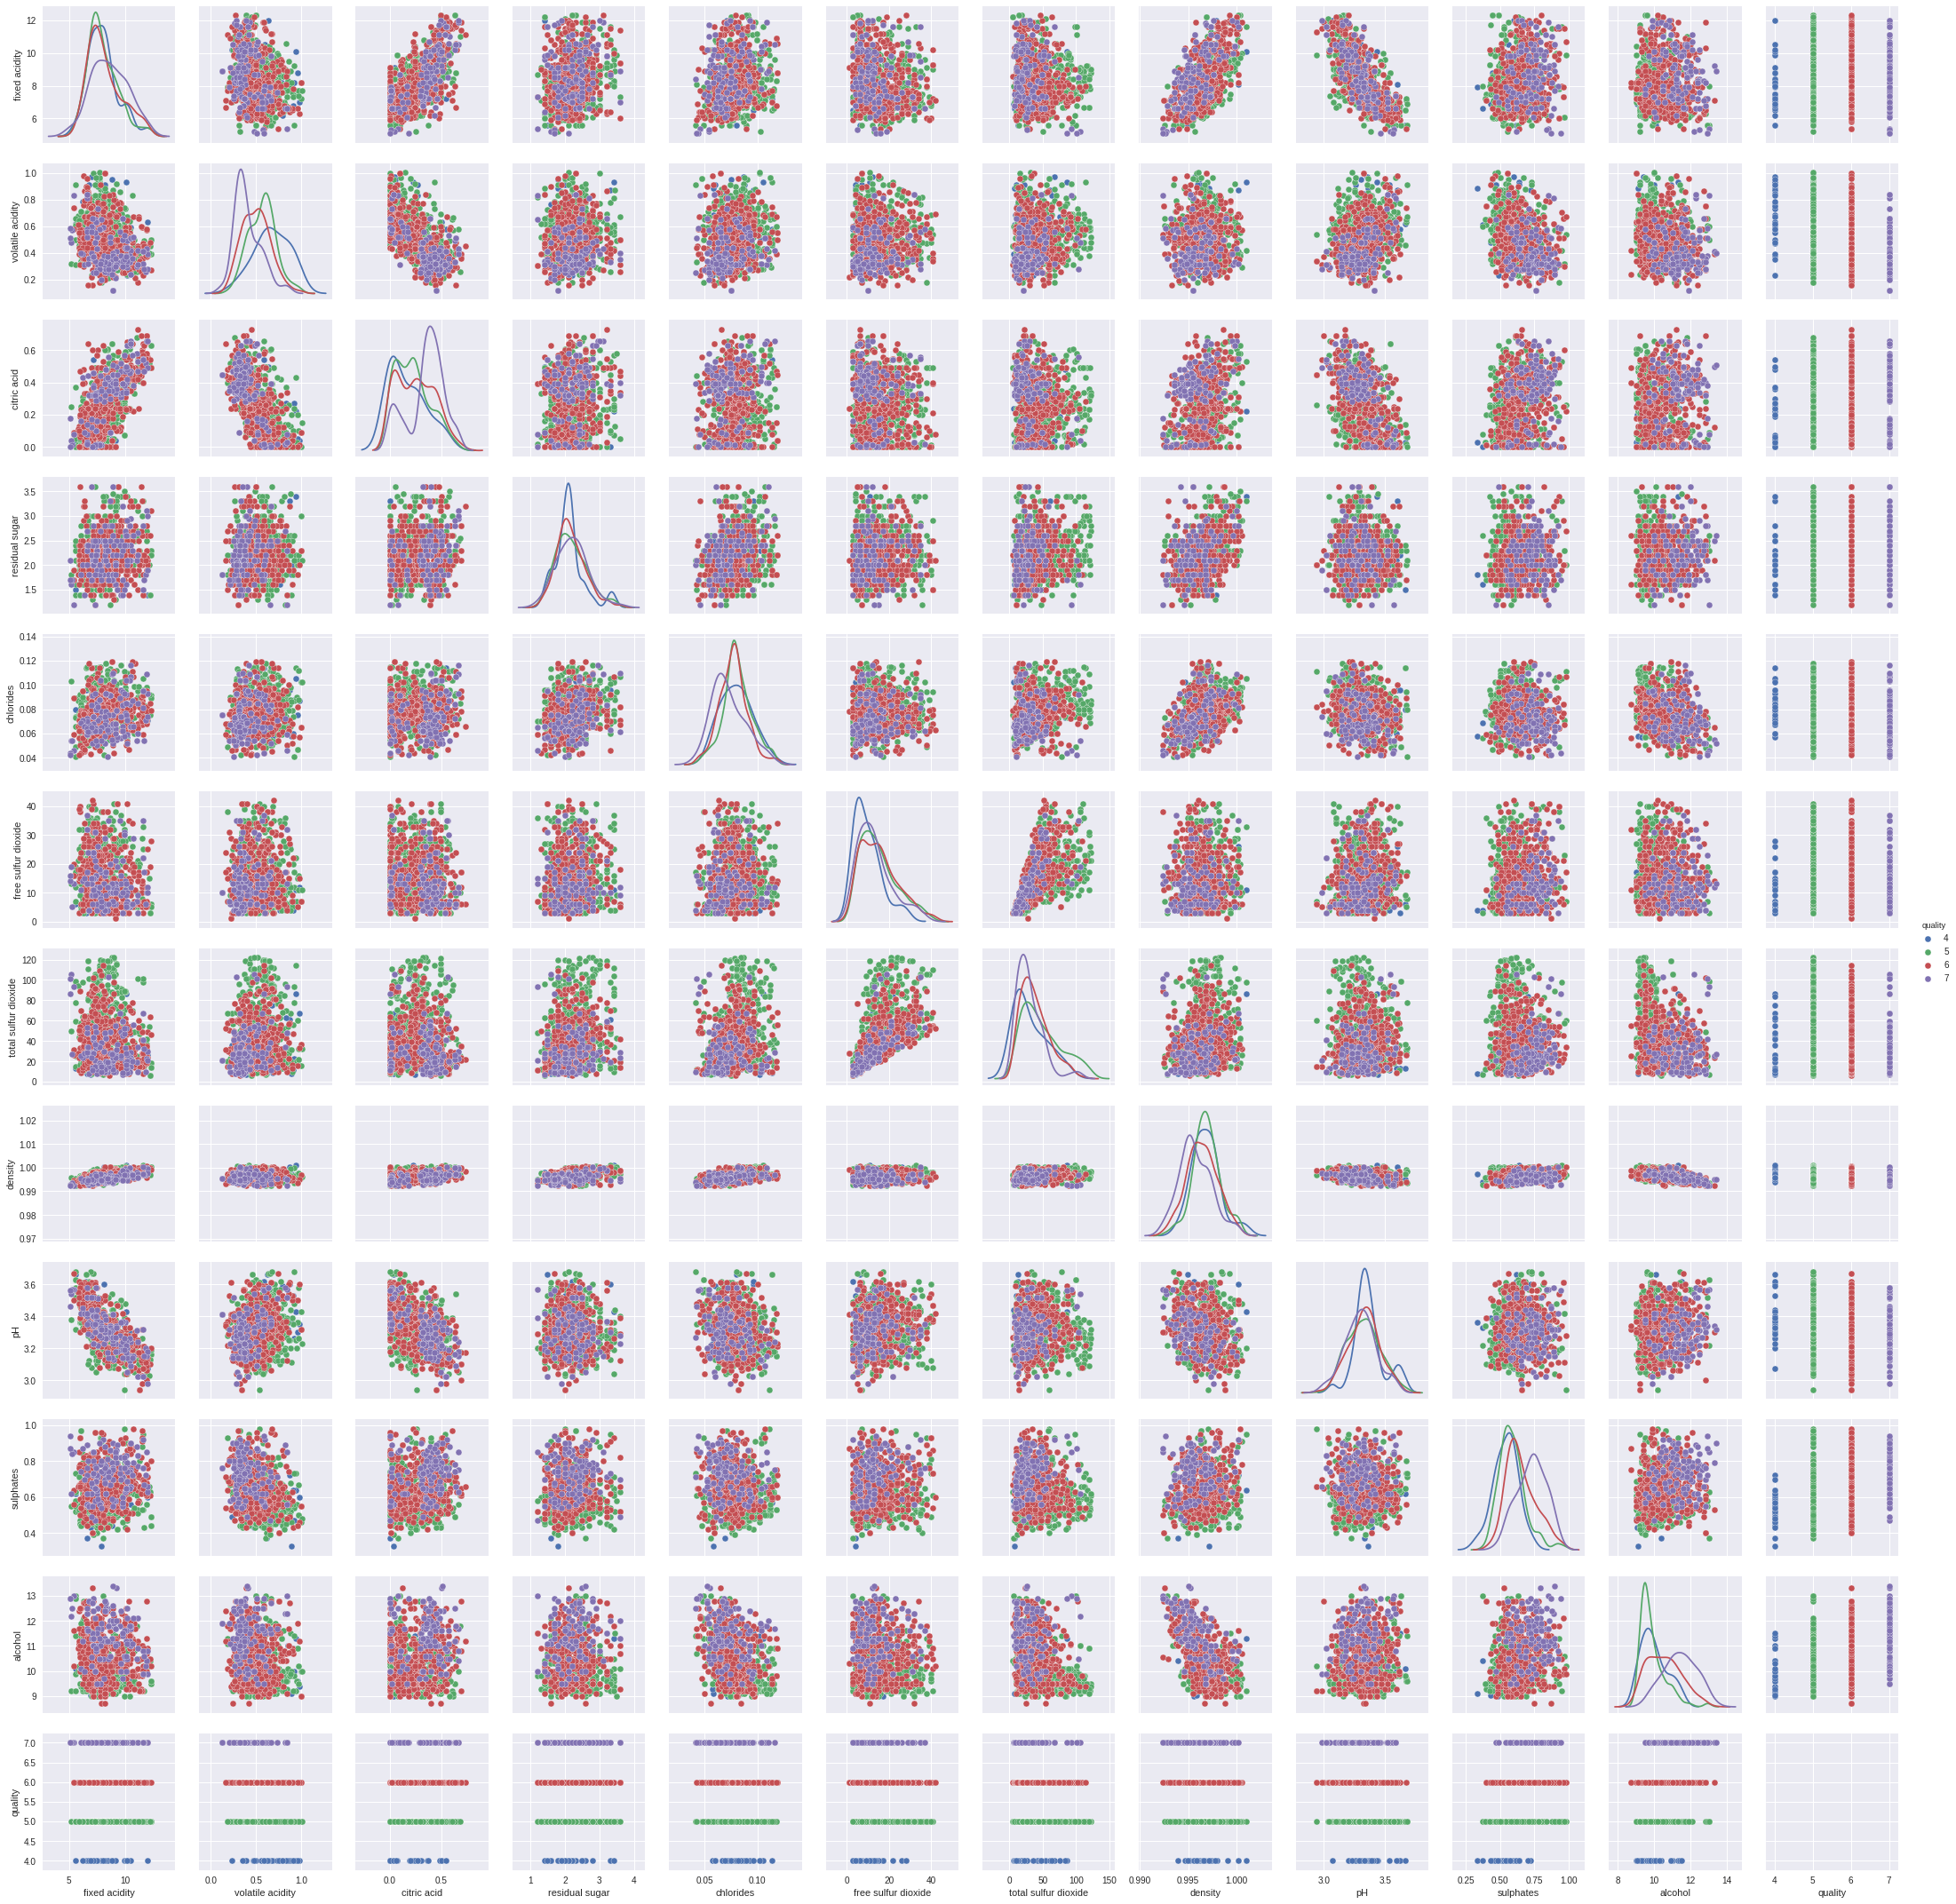

In [0]:
sns.pairplot(df_o,diag_kind='kde', hue='quality')

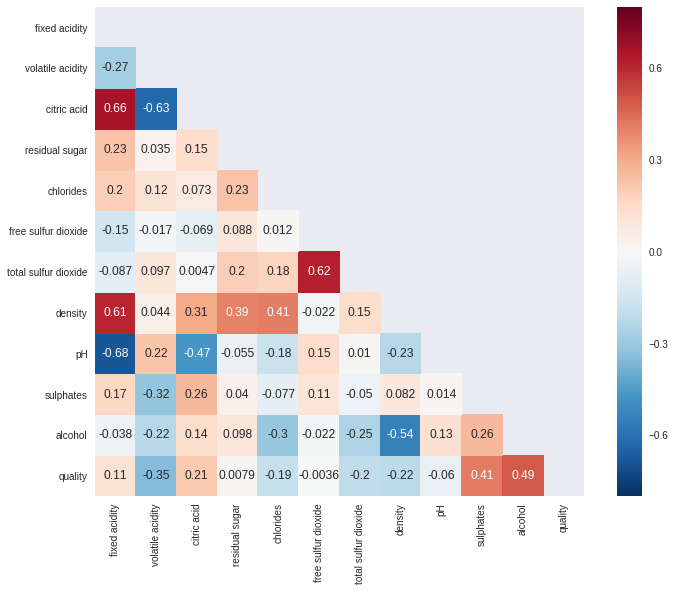

In [0]:
corr = df_o.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 9))
colour = sns.diverging_palette(920, 20, n=20)
plot = sns.heatmap(corr, mask=mask, vmax=.8, square=True, annot=True)
plot

## report = comments on which one correlates 

Colinearaity 

---


Corr between citric acid and fixed acidity is 0.66, very high
Corr between citric acid and volatile acidity is also high but is negatively correlated, -0.63
Total sulfer and free sulfer are highly correlated = 0.62
Density and fixed acidity = 0.61(high) 
pH and fixed acidity -0.68 and ph and citric acid is  -0.47 ( ph measure scale of acidity so make sense) 
High between Alcohol and Density is -0.54

# Partition into train and test

In [0]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_o, test_size=0.3, random_state=42)

In [0]:
x_tr= np.array(train_set[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].astype(float))
y_tr= np.array(train_set[['quality']].astype(str))

x_te= np.array(test_set[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].astype(float))
y_te= np.array(test_set[['quality']].astype(str))

# Dimensionality Reduction Using PCA 


In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt  
%matplotlib inline
import numpy as np  

scaler = StandardScaler()
x_tr = scaler.fit_transform(x_tr)
x_te = scaler.fit_transform(x_te)
print(x_tr)
print(x_te)

[[-0.00586262  1.60574048 -0.80919224 ...  0.24640304 -1.20773159
  -0.88672789]
 [-0.696814   -0.37295391 -0.24848033 ...  0.32222643  0.07526939
   0.02481946]
 [ 2.89613318 -0.12561711  1.3775842  ... -1.04259459 -1.63539859
  -0.78544485]
 ...
 [-1.31867024  0.74006168 -0.86526343 ...  1.83869424 -0.01026401
   1.64534809]
 [-0.97319455  0.74006168 -0.08026676 ...  0.24640304  0.58846978
   0.53123466]
 [-1.04228969  0.24538809 -0.58490748 ...  0.70134338 -0.09579741
   1.34149897]]
[[ 1.70504999 -0.17387105  1.14290579 ... -2.04607849  0.07532376
  -0.87836098]
 [-1.07646013  1.30074207 -0.72942497 ...  0.4741966  -0.97722663
  -0.21395973]
 [ 1.29799972 -0.5277782   0.92263159 ... -1.35873074  1.39101174
   0.8933757 ]
 ...
 [ 1.70504999 -0.46879367  0.42701462 ... -0.59501102  0.68931148
   0.56117507]
 [-0.12667619  0.09155931 -0.39901366 ... -0.13677918 -0.3632389
  -1.4320287 ]
 [ 1.56936656 -0.17387105  1.08783724 ... -0.67138299  0.77702401
   0.67190862]]


In [0]:
x_tr.shape

(825, 11)

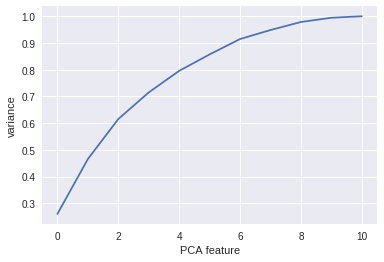

In [0]:
from sklearn.decomposition import PCA 
pca=PCA()

pipeline=make_pipeline (scaler, pca)
pipeline.fit(x_tr)
pipeline.fit(x_te)


pca_tr=PCA().fit(x_tr)
plt.plot(np.cumsum(pca_tr.explained_variance_ratio_))
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks()
plt.show()

We will pick 7 components for our predictions as it attribute for 95% of variance

In [0]:
pca = PCA(n_components= 7)
pca.fit(x_tr)
pca_x = pca.transform(x_tr)
print(pca_x.shape)

(825, 7)


#  Logistic regression - benchmark

In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(x_tr, y_tr)

In [0]:
clf.score(x_te, y_te)

0.652542372881356

Here we can see, by simply using Logistic regression, the accuracy of the prediction is helpful for detecting the quality of the wine. So here we will start to apply more complex models

# Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

RF = RandomForestClassifier(random_state=123)

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators':  [4, 5, 10, 20, 50]}]

grid_search_RF = GridSearchCV(RF, param_grid, cv=5)
grid_search_RF.fit(x_tr, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [4, 5, 10, 20, 50]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
grid_search_RF.best_params_

{'n_estimators': 50}

In [0]:
cvres_RF = grid_search_RF.cv_results_

for mean_score, params in zip(cvres_RF["mean_test_score"], cvres_RF["params"]):
    print(mean_score, params)

0.5927272727272728 {'n_estimators': 4}
0.6024242424242424 {'n_estimators': 5}
0.6351515151515151 {'n_estimators': 10}
0.6496969696969697 {'n_estimators': 20}
0.6654545454545454 {'n_estimators': 50}


# KNN Classifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()

In [0]:
param_grid = [{'n_neighbors':  [3, 5, 10, 20]}]

grid_search_KNN = GridSearchCV(KNN, param_grid, cv=5)
grid_search_KNN.fit(x_tr, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': [3, 5, 10, 20]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
grid_search_KNN.best_params_

{'n_neighbors': 5}

In [0]:
cvres_KNN = grid_search_KNN.cv_results_
for mean_score, params in zip(cvres_KNN["mean_test_score"], cvres_KNN["params"]):
    print(mean_score, params)

0.5503030303030303 {'n_neighbors': 3}
0.5745454545454546 {'n_neighbors': 5}
0.5709090909090909 {'n_neighbors': 10}
0.5624242424242424 {'n_neighbors': 20}


# Thus, we can see that Random Forest with n_estimators = 50 is the best option.

In [0]:
selected_model = RandomForestClassifier(n_estimators=50, max_depth=2,random_state=0)
selected_model.fit(x_tr, y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [0]:
selected_model.score(x_te, y_te)

0.632768361581921

In [0]:
selected_model.predict(x_te)

array(['5', '5', '6', '6', '5', '5', '6', '6', '5', '6', '5', '6', '6',
       '6', '6', '6', '5', '6', '5', '6', '6', '5', '6', '5', '5', '6',
       '5', '6', '6', '5', '6', '6', '6', '6', '6', '5', '5', '6', '6',
       '6', '6', '6', '5', '6', '5', '6', '6', '6', '6', '5', '5', '6',
       '6', '6', '6', '6', '6', '6', '6', '6', '6', '5', '5', '5', '6',
       '6', '6', '5', '5', '5', '6', '6', '6', '6', '6', '5', '5', '5',
       '6', '5', '6', '6', '6', '6', '5', '5', '6', '6', '6', '6', '5',
       '5', '6', '5', '6', '5', '5', '5', '6', '5', '5', '6', '5', '6',
       '5', '5', '6', '6', '6', '6', '5', '5', '6', '6', '5', '6', '6',
       '5', '5', '5', '6', '6', '5', '5', '6', '5', '6', '6', '6', '5',
       '5', '5', '5', '6', '5', '6', '5', '6', '6', '6', '6', '5', '5',
       '6', '5', '6', '6', '5', '6', '5', '5', '6', '5', '6', '5', '5',
       '5', '5', '6', '6', '6', '5', '6', '5', '5', '6', '5', '5', '5',
       '6', '5', '5', '5', '5', '5', '6', '5', '6', '6', '6', '6

Based on above process, we have realize all the predicted value are 5 or 6. Comparing to raw data, we realize 5 and 6 have been dominating the model. So in this case, we can transform the model into a binary decision: Good: quality >= 6, Bad: quality <=5

In [0]:
y_tr_bi = []
for i in y_tr[:,0]:
    if int(i) >= 6:
        y_tr_bi.append(1)
    else:
        y_tr_bi.append(0)
y_tr_bi = np.array(y_tr_bi)        
y_te_bi = []
for i in y_te[:,0]:
    if int(i) >= 6:
        y_te_bi.append(1)
    else:
        y_te_bi.append(0)
y_te_bi = np.array(y_te_bi)

In [0]:
y_tr_bi

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,

In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(x_tr, y_tr_bi)

In [0]:
clf.score(x_te, y_te_bi)

0.7429378531073446

The performance is so much better, and we will reapply random forest

In [0]:
param_grid = [{'n_estimators':  [4, 5, 10, 20, 50]}]

grid_search_RF = GridSearchCV(RF, param_grid, cv=5)
grid_search_RF.fit(x_tr, y_tr_bi)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [4, 5, 10, 20, 50]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
grid_search_RF.best_params_

{'n_estimators': 50}

In [0]:
grid_search_RF.best_score_

0.7624242424242424

In [0]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

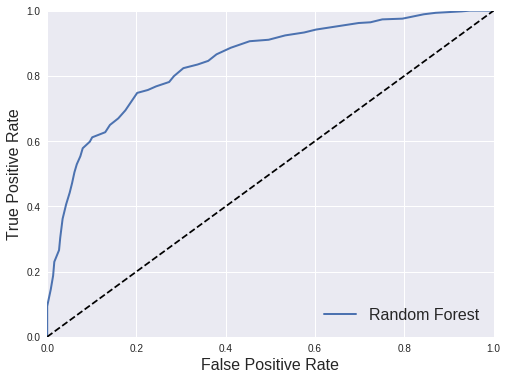

In [0]:
best_RF_model = grid_search_RF.best_estimator_

y_probas_RF = cross_val_predict(best_RF_model, x_tr, y_tr_bi, cv=5, method="predict_proba")
y_scores_RF = y_probas_RF[:, 1] 
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_tr_bi,y_scores_RF)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_RF, tpr_RF, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

# Cluster analysis - KMeans

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_x)
y_kmeans = kmeans.predict(pca_x)

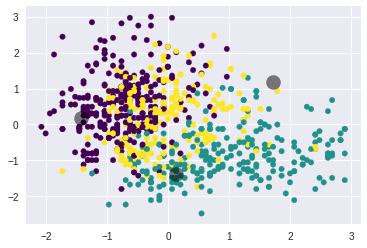

In [0]:
plt.scatter(x_tr[:, 0], x_tr[:, 1], c=y_kmeans, s=30, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

By using Kmeans, we realized our data can be roughly separate into three groups, though with many overlaps, we will try use DBSCAN and Hierarchical for further analysis.

# DBSCAN clustering 

In [0]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1.5, min_samples=3)
y_db = db.fit_predict(pca_x)


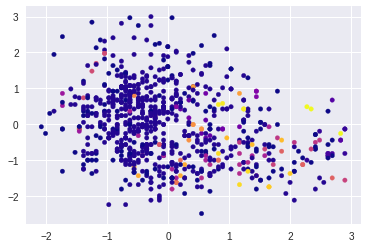

In [0]:
plt.scatter(x_tr[:, 0], x_tr[:, 1], c=y_db, s=20, cmap='plasma')

Based on the result of using DBSCAN, we may state that our data are not too far from each others, since all the outliers cannot really form into a new group.

# Hierarchical Clustering 

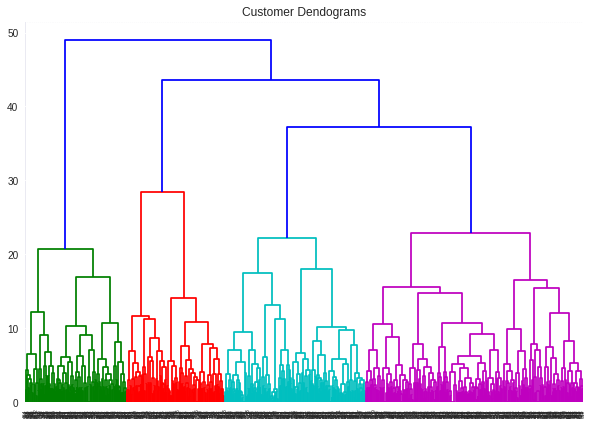

In [0]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
linkage_matrix = shc.linkage(x_tr, method='ward')
dend = shc.dendrogram(linkage_matrix) 

Using Hierarchical analysis, our data can be trivially separate into 3 groups, we will find the index of these data and analysis their characteristics

After we have complete the model, we can subset the data into 4 different groups based on the index of the data. Which we will not focus on for this project